In [1]:
import numpy as np
import pandas as pa
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sea
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.timeseries import LombScargle
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit


def func(x, a, b):
    return a * x + b

## Make variable table

In [7]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/test_3rd_FUors_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4800.csv')
ab

,Index,ra,dec,dist_sd,avg_W1,stdev_W1,avg_eW1,avg_W2,stdev_W2,avg_eW2,...,single_fap,mod_baluev_fap,amp,sinamp,ls_meanjy,sd_sdfid_periodrmv,sd_periodrmv,chi2_period_w2,linear_fap_periodrmv,Deltaw2_periodrmv
0,11001,9.191637,63.481380,1.044444,6.318159,0.498337,0.223216,5.171286,0.479109,0.257916,...,6.457037e-03,1.891832e-02,0.733848,0.733709,1.444721,1.164813,0.462676,12.790088,0.999472,1.374079
1,11002,81.466558,34.875027,0.071909,7.417657,0.272708,0.090963,6.604840,0.256883,0.075687,...,2.791924e-07,3.382035e-06,0.118227,0.127549,0.357695,0.789709,0.023364,12.815994,0.959580,0.197471
2,11003,84.575406,-7.040545,0.548315,3.935841,0.067903,0.428414,2.166416,0.142662,0.347164,...,8.145585e-03,4.265379e-02,3.002961,3.002538,23.452069,0.282376,2.117950,0.932787,0.910398,0.286115
3,11004,85.702033,-8.276318,0.189739,6.807498,0.135249,0.154579,5.511261,0.158265,0.166291,...,3.210632e-06,3.628695e-05,0.207404,0.229437,0.999721,0.302753,0.050856,1.491440,0.996182,0.187932
4,11005,86.343188,9.070082,0.488070,4.778105,0.084387,0.329114,4.181336,0.119615,0.256856,...,1.223040e-04,9.318164e-04,0.492513,0.509661,3.757051,0.205370,0.178636,0.533890,0.999385,0.188096
5,11006,104.342595,-8.388245,0.286963,6.268379,0.138066,0.175269,5.174467,0.095214,0.196315,...,1.116314e-06,1.459945e-05,0.181747,0.222042,1.363505,0.153622,0.041017,0.337850,0.986171,0.097767
6,11007,104.881621,-4.091046,0.100483,7.070874,0.223090,0.127854,6.367177,0.238736,0.093422,...,6.807242e-03,3.283212e-01,0.337657,0.337583,0.396471,2.601824,0.117871,39.216528,0.752398,0.729144
7,11008,305.950067,42.207161,0.111980,7.193280,0.083696,0.120465,6.409768,0.082604,0.091396,...,1.814226e-04,1.267604e-03,0.046627,0.052209,0.487068,0.383189,0.015270,2.001137,0.960361,0.108539
8,11009,314.570951,43.895372,0.336416,7.190621,0.135376,0.156274,6.652901,0.101229,0.088511,...,2.342805e-05,2.032695e-04,0.043016,0.043991,0.381559,0.405351,0.012499,2.405172,0.979950,0.122665
9,11010,314.587892,52.491031,0.783357,6.410925,0.408183,0.181901,4.651548,0.226493,0.258088,...,3.055315e-08,5.346900e-07,0.642003,0.644619,2.376191,0.208896,0.119376,0.439753,0.997975,0.195801


In [31]:
ab = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/test_3rd_FUors_obsb_outcut_md_taurus_NEOWISE_avg2_median_maxmin_4800.csv')


abc = ab[(ab.N_w2 > 5) &
         (ab.dist_sd < 0.3) &
         (ab.avg_eW2 < 0.2) &
         (ab.Delta_w2 > 3*ab.avg_eW2) &
#          (ab.sd_sdfid_w2_flux > 3) &
         (ab['class']) ]
#          & (ab['period'] > 200)]  #200 밑에인게 한개 있었다... 

print('initial:', len(abc))
# print('original:', len(abcd) )



# by LSP
print('linear')
 # 50

abc_lin = abc[(abc.baluev_fap*200/abc.period<0.01) &    #52
              (abc.period >= 4800) & 
              (abc.linear_fap_w2 < 1e-4)]

print('lin_total',len(abc_lin))
# abc_lin.to_csv('/home/wooseok/WISE_data/csvfiles/typeI_linear_variables.csv') #total 126
# print(abc_lin.s_index)

# FAP (LLSF) < 0.001 - FAP(LSP) < 0.01
#                    - FAP(LSP) > 0.01 - 있나??
#                                      - 모두 4000 + 하나 2800, 
#                                         얘들은 그럼 irregular?
#                                         - 0.001

# abc_lin[abc_lin.period < 3000].s_index.values

# not by LSP but linear?
# abc_lin_nop = abc[(abc.baluev_fap*200/abc.period > 0.01) &
#                  (abc.linear_fap_w2<0.0001)]
# abc_lin_nop.s_index.values
# abc_lin_nop

# abc_more_lin = abc[(abc.linear_fap_w2 < 0.001) &
#                   (abc.period < 5000) &
#                   (abc.period > 4000)]
# abc_more_lin.s_index.values


# abc_not_lin = abc[(abc.linear_fap_w2 > 0.001) &
#                   (abc.baluev_fap*200/abc.period < 0.01) &
#                   (abc.period > 4000)]
# abc_not_lin.period.value_counts()
# abc_not_lin.s_index.values
# abc_lin = abc[abc.linear_fap_w2 < 0.0001]
# abc_lin

# abc_lin_nop.period
# print(abc_lin_nop.baluev_fap*200/abc_lin_nop.period)
# abc_lin_nop


#Type II - period

abc_per = abc[(abc.baluev_fap*200/abc.period<0.01) & # total 79 #changed
  (abc.period > 200 ) & (abc.period < 1200)] 
print('per_total: ',len(abc_per))
# abc_per.to_csv('/home/wooseok/WISE_data/csvfiles/typeII_periodic_variables.csv')


#Type III - curved


abc_cur = abc[(abc.baluev_fap*200/abc.period<0.01) & # 48 # changed
                      ( # 2 conditions
                          
                      (  (abc.period >= 1200) & (abc.period < 4800)  )
                       |  #or
                      (  (abc.linear_fap_w2 > 1e-4) & (abc.period == 4800)) 
                          
                      )
                       ]
print('cur_total: ', len(abc_cur))
# abc_cur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIII_curved_variables.csv') #total 

abc_sec = pa.concat([abc_lin, abc_per, abc_cur]) #no duplication
# abc.set_index('s_index')
abc_stoch = abc.set_index('Index').drop(abc_sec['Index'].values)



#Type IV - burst
# max-median / deltaw2 > 0.8
abc_bur = abc_stoch[((abc_stoch.median_W2-abc_stoch.max_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 58
#   (abc.Delta_w2 > 0.5)]

print('bur_total: ', len(abc_bur))
# abc_bur.to_csv('/home/wooseok/WISE_data/csvfiles/typeIV_burst_variables.csv')


#Type V - dimming
# median - min / deltaw2 > 0.8
abc_dim = abc_stoch[(abs(abc_stoch.median_W2-abc_stoch.min_W2)/abc_stoch.Delta_w2 > 0.8)]# & # total 16
#               (abs(abc.median_W2-abc.min_W2)/abc.Delta_w2 < 0.8) &
#               (abc.Delta_w2 > 0.5)]
print('dim_total: ',len(abc_dim))
# abc_dim.to_csv('/home/wooseok/WISE_data/csvfiles/typeV_dim_variables.csv')

#Type VI - irregular
# lin per cur bur dim... else.

abc_lin = abc_lin.set_index('Index')
abc_per = abc_per.set_index('Index')
abc_cur = abc_cur.set_index('Index')

abc_aa = pa.concat([abc_lin, abc_per, abc_cur, abc_bur, abc_dim],verify_integrity=False)

print('sources : ',len(abc_lin), len(abc_per), len(abc_cur), len(abc_bur), len(abc_dim))


abc_irr = abc.set_index('Index').drop(abc_aa.index.values)
abc_irr_3 = abc_irr[abc_irr.sd_sdfid_w2_flux > 3]
print('abc_irr_3: ',len(abc_irr_3))

# abc_irr_3.to_csv('/home/wooseok/WISE_data/csvfiles/typeVI_irr_variables.csv')




print('irr: ', len(abc_irr_3))

abc_lin['var_type'] = 'linear'
abc_cur['var_type'] = 'curved'
abc_per['var_type'] = 'periodic'
abc_bur['var_type'] = 'burst'
abc_dim['var_type'] = 'drop'
abc_irr_3['var_type'] = 'irregular'

abc_total = pa.concat([abc_lin, abc_cur, abc_per, abc_bur, 
                      abc_dim, abc_irr_3])

abcd = abc_total.sort_values('Index').reset_index()

# unify classification to P,D,PMS+E

abcd
# abcd.to_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_4800_FUors.csv')

initial: 20
linear
lin_total 7
per_total:  0
cur_total:  4
bur_total:  1
dim_total:  0
sources :  7 0 4 1 0
abc_irr_3:  4
irr:  4


<ipython-input-31-c39d403b20ba>:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_bur['var_type'] = 'burst'
<ipython-input-31-c39d403b20ba>:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc_irr_3['var_type'] = 'irregular'


,Index,ra,dec,dist_sd,avg_W1,stdev_W1,avg_eW1,avg_W2,stdev_W2,avg_eW2,...,mod_baluev_fap,amp,sinamp,ls_meanjy,sd_sdfid_periodrmv,sd_periodrmv,chi2_period_w2,linear_fap_periodrmv,Deltaw2_periodrmv,var_type
0,11002,81.466558,34.875027,0.071909,7.417657,0.272708,0.090963,6.604840,0.256883,0.075687,...,0.000003,0.118227,0.127549,0.357695,0.789709,0.023364,12.815994,0.959580,0.197471,linear
1,11008,305.950067,42.207161,0.111980,7.193280,0.083696,0.120465,6.409768,0.082604,0.091396,...,0.001268,0.046627,0.052209,0.487068,0.383189,0.015270,2.001137,0.960361,0.108539,curved
2,11012,315.105184,52.504707,0.078111,9.534211,0.110740,0.020930,7.380958,0.075368,0.044197,...,0.009579,0.017029,0.019806,0.197503,0.937607,0.007349,11.472660,0.934006,0.136971,curved
3,11014,343.388576,62.539897,0.088010,7.605272,0.117693,0.061781,6.806888,0.127868,0.058966,...,0.000027,0.049464,0.052892,0.310181,0.723023,0.013036,6.737067,0.995759,0.173328,linear
4,11018,83.861442,-5.065300,0.102169,8.914221,0.086991,0.064549,7.007863,0.082472,0.061921,...,0.001177,0.021309,0.021746,0.264807,0.724941,0.011467,4.658253,0.999210,0.174199,linear
5,11021,117.648302,-33.106640,0.048382,7.876872,0.107038,0.042743,7.180522,0.092942,0.045917,...,0.000143,0.025527,0.025928,0.234308,0.700465,0.006881,7.100995,0.899495,0.096738,linear
6,11022,292.253539,9.645389,0.043838,8.865629,0.031649,0.039302,7.618381,0.052038,0.042048,...,0.000625,0.009626,0.010412,0.157344,0.520277,0.003107,3.780011,0.998986,0.070543,linear
7,11024,331.709870,59.046080,0.136811,9.801078,0.082875,0.026294,8.440575,0.062707,0.047210,...,0.000022,0.005214,0.005216,0.071916,0.471282,0.001485,2.994408,0.999995,0.079149,linear
8,11025,86.554583,-0.101333,0.279493,7.177979,0.944133,0.120287,5.792177,0.879098,0.150531,...,0.000112,0.625508,0.625414,0.841646,1.447602,0.269016,35.492542,0.957575,1.080480,curved
9,11031,277.463385,1.277635,0.069435,10.073863,0.505956,0.027248,7.939463,0.531532,0.044343,...,0.240915,0.060325,0.060317,0.107149,7.519603,0.041157,609.078715,0.126577,0.943657,irregular


## Combined variable table

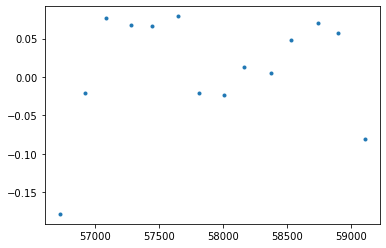

In [36]:
plt.plot(w2av.mjd,mw2f,'.')

In [39]:
(np.median(mw2f)-min(mw2f))/dw2

0.811130628435294

In [35]:
# call index from var_table
vart = abcd       # from the previous cell

for i in range(1):

    index = vart.iloc[i]['Index']
    print(index)
    
    wavg = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/outlier_cut_data/'
            +str(index)+'_cavg.csv', 
             names=['mjd','mag','emag','flt','class'],
             skiprows=1)
    

    w2av = wavg[wavg['flt'] == 'W2']
    w2f = 171.85 * 10 ** (-w2av.mag / 2.5)  # flux 10%-90%
    ew2f = w2av.emag * w2f / 1.0857



    # linear fit 


    if vart.iloc[i].var_type == 'linear':


        resw2, cov = curve_fit(func, w2av.mjd, w2f, sigma=ew2f, #ferr/fw2[0]
                                           absolute_sigma=True)
        yfit = np.polyval(resw2, w2av.mjd)

    #     plt.figure()
    #     plt.errorbar(w2av.mjd,w2f,ew2f,fmt='.')
    #     plt.plot(w2av.mjd,yfit)

        mfit = -2.5*np.log10(yfit/171.85)
        mw2f = mfit-w2av.mag

        # SD/MU (flux) after remove linear fit
        
        ydiff = w2f-yfit
        
    #     plt.figure()
    #     plt.errorbar(w2av.mjd,mw2f,fmt='.')

        dw2 = max(mw2f)-min(mw2f)

    #     print('burst: ',(max(mw2f)-np.median(mw2f))/dw2)
    #     print('dim: ',(np.median(mw2f)-min(mw2f))/dw2)
        vart.loc[i,'sd_linrmv'] = np.std(ydiff)
        vart.loc[i,'mu_linrmv'] = np.mean(ew2f)
        vart.loc[i,'sd_mu_linrmv'] = np.std(ydiff)/np.mean(ew2f)
        vart.loc[i,'Deltaw2_linrmv'] = dw2
        if (max(mw2f)-min(mw2f))/np.mean(w2av.emag) > 3:
        
            # burst
            if max(mw2f)-np.median(mw2f) > 0.8*dw2:
                print(index,'burst!')
                vart.loc[i,'combined_type'] = 'burst'


            # drop
            elif np.median(mw2f)-min(mw2f) > 0.8*dw2:
                print(index,'dim!')
                vart.loc[i,'combined_type'] = 'drop'
            # irregular
            elif np.std(ydiff)/np.mean(ew2f) > 3:
                print(index, 'irregular!')
                vart.loc[i,'combined_type'] = 'irregular'
            
            else:
                vart.loc[i,'combined_type'] = np.nan
        else:
            vart.loc[i,'combined_type'] = np.nan



    elif vart.iloc[i].var_type == 'periodic':
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4800)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        flux_jdot = lsav.model(w2av.mjd,best_frequency)


        # plt.figure()
        # plt.errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
        # plt.plot(smjd, flux_jmod, color='r', lw=2,
        #                  alpha=0.8
        #               )

        #residual - burst
        nw2f = -2.5*np.log10(flux_jdot/171.85)

        mw2f = nw2f - w2av.mag



        dw2 = max(mw2f)-min(mw2f)

        print('burst: ',(max(mw2f)-np.median(mw2f))/dw2)
        print('dim: ',(np.median(mw2f)-min(mw2f))/dw2)

        
        if (max(mw2f)-min(mw2f))/np.mean(w2av.emag) > 3:
        
            # burst
            if max(mw2f)-np.median(mw2f) > 0.8*dw2:
                print(index,'burst!')
                vart.loc[i,'combined_type'] = 'burst'


            # drop
            elif np.median(mw2f)-min(mw2f) > 0.8*dw2:
                print(index,'dim!')
                vart.loc[i,'combined_type'] = 'drop'
            
            # irregular
            elif vart.loc[i,'sd_sdfid_periodrmv'] > 3:
                print(index, 'irregular!')
                vart.loc[i,'combined_type'] = 'irregular'
            
            else:
                vart.loc[i,'combined_type'] = np.nan
        else:
            vart.loc[i,'combined_type'] = np.nan
            
            
            
    
    elif vart.iloc[i].var_type == 'curved':
        
        lsav = LombScargle(w2av.mjd, w2f, ew2f)
        frequency, power = lsav.autopower(  # nyquist_factor=5,
                                            maximum_frequency=1/200, #40 days  # 0.004,#minimum period > 250days
                                            minimum_frequency=1/4800)
        best_frequency = frequency[np.argmax(power)]
        arw2m = np.squeeze(np.array([w2av.mjd]))
        smjd = np.linspace(arw2m[0], arw2m[-1], 1000)
        flux_jmod = lsav.model(smjd, best_frequency)
        flux_jdot = lsav.model(w2av.mjd,best_frequency)


        # plt.figure()
        # plt.errorbar(w2av.mjd, w2f, ew2f, fmt='k.')
        # plt.plot(smjd, flux_jmod, color='r', lw=2,
        #                  alpha=0.8
        #               )

        #residual - burst
        nw2f = -2.5*np.log10(flux_jdot/171.85)

        mw2f = nw2f - w2av.mag



        dw2 = max(mw2f)-min(mw2f)

        print('burst: ',(max(mw2f)-np.median(mw2f))/dw2)
        print('dim: ',(np.median(mw2f)-min(mw2f))/dw2)

        if (max(mw2f)-min(mw2f))/np.mean(w2av.emag) > 3:
        
            # burst
            if max(mw2f)-np.median(mw2f) > 0.8*dw2:
                print(index,'burst!')
                vart.loc[i,'combined_type'] = 'burst'


            # drop
            elif np.median(mw2f)-min(mw2f) > 0.8*dw2:
                print(index,'dim!')
                vart.loc[i,'combined_type'] = 'drop'
            
            # irregular
            elif vart.loc[i,'sd_sdfid_periodrmv'] > 3:
                print(index, 'irregular!')
                vart.loc[i,'combined_type'] = 'irregular'
                
            else:
                vart.loc[i,'combined_type'] = np.nan
        else:
            vart.loc[i,'combined_type'] = np.nan
    
    elif vart.iloc[i].var_type == 'irregular':
        vart.loc[i,'combined_type'] = np.nan
    
    
    else:
        vart.loc[i,'combined_type'] = np.nan

        



# vart.to_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800_FUor.csv',index=None)

vart

11002
11002 dim!


,Index,ra,dec,dist_sd,avg_W1,stdev_W1,avg_eW1,avg_W2,stdev_W2,avg_eW2,...,sd_periodrmv,chi2_period_w2,linear_fap_periodrmv,Deltaw2_periodrmv,var_type,sd_linrmv,mu_linrmv,sd_mu_linrmv,Deltaw2_linrmv,combined_type
0,11002,81.466558,34.875027,0.071909,7.417657,0.272708,0.090963,6.604840,0.256883,0.075687,...,0.023364,12.815994,0.959580,0.197471,linear,0.029346,0.029586,0.991882,0.256958,drop
1,11008,305.950067,42.207161,0.111980,7.193280,0.083696,0.120465,6.409768,0.082604,0.091396,...,0.015270,2.001137,0.960361,0.108539,curved,NaN,NaN,NaN,NaN,NaN
2,11012,315.105184,52.504707,0.078111,9.534211,0.110740,0.020930,7.380958,0.075368,0.044197,...,0.007349,11.472660,0.934006,0.136971,curved,NaN,NaN,NaN,NaN,NaN
3,11014,343.388576,62.539897,0.088010,7.605272,0.117693,0.061781,6.806888,0.127868,0.058966,...,0.013036,6.737067,0.995759,0.173328,linear,0.017528,0.018030,0.972125,0.225125,NaN
4,11018,83.861442,-5.065300,0.102169,8.914221,0.086991,0.064549,7.007863,0.082472,0.061921,...,0.011467,4.658253,0.999210,0.174199,linear,0.010443,0.015817,0.660256,0.152548,NaN
5,11021,117.648302,-33.106640,0.048382,7.876872,0.107038,0.042743,7.180522,0.092942,0.045917,...,0.006881,7.100995,0.899495,0.096738,linear,0.005740,0.009823,0.584334,0.085964,NaN
6,11022,292.253539,9.645389,0.043838,8.865629,0.031649,0.039302,7.618381,0.052038,0.042048,...,0.003107,3.780011,0.998986,0.070543,linear,0.003571,0.005972,0.598053,0.072548,NaN
7,11024,331.709870,59.046080,0.136811,9.801078,0.082875,0.026294,8.440575,0.062707,0.047210,...,0.001485,2.994408,0.999995,0.079149,linear,0.001671,0.003150,0.530401,0.085291,NaN
8,11025,86.554583,-0.101333,0.279493,7.177979,0.944133,0.120287,5.792177,0.879098,0.150531,...,0.269016,35.492542,0.957575,1.080480,curved,NaN,NaN,NaN,NaN,NaN
9,11031,277.463385,1.277635,0.069435,10.073863,0.505956,0.027248,7.939463,0.531532,0.044343,...,0.041157,609.078715,0.126577,0.943657,irregular,NaN,NaN,NaN,NaN,NaN


In [183]:
vart['class'].value_counts()

D        1146
P         403
PMS+E     185
Name: class, dtype: int64

In [219]:
len(vart)

1734

In [236]:
np.round(100*np.array([[6, 31, 81, 118],
                     [13,117,7,137],
                      [0, 27, 7, 34],
                      [244, 757, 54, 1055],
                      [403, 1146, 185, 1734]])/
         np.array([735, 3459, 1202, 5396]),1)

array([[ 0.8,  0.9,  6.7,  2.2],
       [ 1.8,  3.4,  0.6,  2.5],
       [ 0. ,  0.8,  0.6,  0.6],
       [33.2, 21.9,  4.5, 19.6],
       [54.8, 33.1, 15.4, 32.1]])

In [267]:
vart.loc[
    (vart.var_type == 'curved') &
    (vart.combined_type == "irregular"), #&
#     (vart['class'] == 'PMS+E'),
    ['Index','class','var_type','combined_type']
     ]


# var0 = vart.fillna(0)
# var0[(var0.combined_type != 0) #&
# #     (var0['class'] == "PMS+E")
#     ]

,Index,class,var_type,combined_type
1,4,P,curved,irregular
103,261,D,curved,irregular
105,267,D,curved,irregular
106,270,P,curved,irregular
121,321,D,curved,irregular
...,...,...,...,...
1639,6391,D,curved,irregular
1657,6438,D,curved,irregular
1675,10017,D,curved,irregular
1715,10284,D,curved,irregular


In [23]:
?np.isnan

In [69]:
vart.loc[(vart['class'] == "P") |
(vart['class'] == "F") |
(vart['class'] == "FP") |
(vart['class'] == "0") |
(vart['class'] == "I") |
(vart['class'] == "I?"),'class'] = 'P'

0        P
1        P
6       FP
8        P
9        P
        ..
1705     I
1712     I
1713     I
1717     I
1722     I
Name: class, Length: 402, dtype: object

In [76]:
vart['class']

0       P
1       P
2       D
3       D
4       D
       ..
1721    D
1722    P
1723    D
1724    D
1725    D
Name: class, Length: 1726, dtype: object

In [93]:
vart.to_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv',index=None)

# (vart.combined_type == 'irregular') & 

In [79]:
ddd =pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined.csv')
ddd['class']

0       P
1       P
2       D
3       D
4       D
       ..
1721    D
1722    P
1723    D
1724    D
1725    D
Name: class, Length: 1726, dtype: object

In [45]:
vart0 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
vart0[vart0.combined_type == 'irregular']

,s_index,dist_sd,ra,dec,avg_W1,stdev_W1,avg_eW1,avg_W2,stdev_W2,avg_eW2,...,sd_sdfid_periodrmv_w1,sd_periodrmv_w1,chi2_period_w1,linear_fap_periodrmv_w1,Deltaall_w1_periodrmv,var_type,combined_type,sd_linrmv,mu_linrmv,sd_mu_linrmv
32,85,0.048292,85.700583,-9.771250,12.034298,0.377202,0.031138,11.335219,0.419501,0.037727,...,3.737513,0.000287,151.851288,0.996842,0.327033,linear,irregular,0.000603,0.000170,3.545553
136,424,0.035664,85.512208,-7.939083,10.183795,0.275304,0.022393,9.928604,0.335202,0.023067,...,4.601156,0.001394,237.494000,0.822286,0.334125,curved,irregular,NaN,NaN,NaN
227,709,0.063422,84.664625,-6.991750,12.262076,0.250775,0.036758,10.530492,0.303641,0.027110,...,4.202606,0.000308,159.021218,0.993656,0.545801,curved,irregular,NaN,NaN,NaN
232,737,0.062046,84.485708,-6.944222,12.164324,0.354533,0.036821,9.461340,0.269151,0.025519,...,3.073715,0.000246,77.492552,0.980893,0.420665,curved,irregular,NaN,NaN,NaN
300,1019,0.062470,84.071917,-6.186389,12.119208,0.204202,0.032614,10.152229,0.226197,0.026609,...,3.013445,0.000222,104.858264,0.996211,0.320062,curved,irregular,NaN,NaN,NaN
312,1074,0.046159,83.852083,-6.029528,10.877110,0.218183,0.031581,10.270998,0.239098,0.030207,...,3.837269,0.000880,84.630009,0.973192,0.479241,curved,irregular,NaN,NaN,NaN
326,1136,0.067606,84.079250,-5.923750,11.554286,0.346798,0.035607,10.136539,0.226179,0.024647,...,3.613407,0.000483,125.609946,0.996966,0.428342,curved,irregular,NaN,NaN,NaN
356,1300,0.076184,83.656292,-5.688056,9.885523,0.133401,0.024871,9.594672,0.192657,0.023350,...,2.617012,0.001153,67.981354,0.990781,0.209128,curved,irregular,NaN,NaN,NaN
398,1438,0.053663,84.029292,-5.571722,9.700521,0.336298,0.033545,8.795764,0.401736,0.037390,...,3.138266,0.002284,114.352018,0.791229,0.318556,curved,irregular,NaN,NaN,NaN
423,1556,0.069334,83.815958,-5.501528,10.971490,0.186815,0.058934,10.631634,0.352802,0.058261,...,1.983279,0.000751,49.808238,0.975218,0.350069,curved,irregular,NaN,NaN,NaN


In [340]:
vart.loc[vart.var_type == 'linear',['s_index','class','var_type','combined_type',
                                   'sd_linrmv', 'mu_linrmv', 'sd_mu_linrmv']]
vart.loc[vart.var_type == 'periodic',['s_index','class','var_type','combined_type',
                                   'sd_sdfid_periodrmv']]

vart.loc[(vart.var_type == 'periodic') & (vart.combined_type == 'irregular')].sd_sdfid_periodrmv

Series([], Name: sd_sdfid_periodrmv, dtype: float64)

In [341]:
# save to a file
vart.loc[vart.combined_type == 'irregular',['s_index','class','var_type','combined_type']]
# vart.to_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv',index=False)

### Find irregular

In [322]:
vari = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined_linrmv.csv')
vari['class'].value_counts()

D        944
P        337
PMS+E    157
Name: class, dtype: int64

In [323]:
# for only linear, calculate sd_sdfid_rmv


Index(['s_index', 'dist_sd', 'ra', 'dec', 'avg_W1', 'stdev_W1', 'avg_eW1',
       'avg_W2', 'stdev_W2', 'avg_eW2', 'N_w1', 'N_w2', 'slope_w1', 'slope_w2',
       'sd_sdfid_w1_flux', 'sd_sdfid_w2_flux', 'sd_sdfid_w1_mag',
       'sd_sdfid_w2_mag', 'Delta_w1', 'Delta_w2', 'Delta_w1_flux',
       'Delta_w2_flux', 'class', 'catalogue', 'Sw1', 'DeltaSw1', 'Sw2',
       'DeltaSw2', 'SDw1', 'SDfidw1', 'SDw2', 'SDfidw2', 'chi2_mean_w1',
       'chi2_wmean_w1', 'chi2_slope_w1', 'chi2_mean_w2', 'chi2_wmean_w2',
       'chi2_slope_w2', 'linear_fap_w1', 'linear_fap_w2', 'center_mag_w1',
       'center_mag_w2', 'max_W1', 'min_W1', 'median_W1', 'max_W2', 'min_W2',
       'median_W2', 'col1', 'index', 'period', 'baluev_fap', 'power', 'amp',
       'sinamp', 'ls_meanjy', 'sd_sdfid_periodrmv', 'sd_periodrmv',
       'chi2_period_w2', 'linear_fap_periodrmv', 'Deltaall_w2_periodrmv',
       'period_w1', 'baluev_fap_w1', 'power_w1', 'amp_w1', 'sinamp_w1',
       'ls_meanjy_w1', 'sd_sdfid_periodrmv_w1', 's

### Count sources

In [350]:
varc = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
len(varc.loc[(varc.combined_type == 'irregular') &
         (varc.var_type == 'linear'),['s_index','class','var_type','combined_type'] ])
         
         
         
#          ['s_index','class','var_type','combined_type']]

8

### Taurus

In [265]:
tau.disk.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
514    False
515    False
516     True
517    False
518    False
Name: disk, Length: 519, dtype: bool

In [268]:
tau = pa.read_csv('/home/wooseok/WISE_data/Taurus/ysos_info.dat', 
           names=['index','ra','dec','disk'], sep="\s+", skiprows=1)
len(tau[tau.disk.isnull() == False])

492

In [173]:
abc =pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
# dd['class'].value_counts()

pr = abc[(abc['class'] == "P") |
        (abc['class'] == "F") |
        (abc['class'] == "FP") |
        (abc['class'] == "0") |
        (abc['class'] == "I") |
        (abc['class'] == "I?") ]



di = abc[(abc['class'] == "D") |
        (abc['class'] == "II") |
        (abc['class'] == "full") |
        (abc['class'] == "full?") |
        (abc['class'] == "debris/ev trans") |
        (abc['class'] == "transitional") |
        (abc['class'] == "evolved") |
        (abc['class'] == "ev or trans") 
        ]

ev = abc[(abc['class'] == "E") |
        (abc['class'] == "III") 
        ]


pr.loc[:,'class']='P'
di.loc[:,'class']='D'
ev.loc[:,'class']='PMS+E'

abcd = pa.concat([pr,di,ev],verify_integrity=True)
abcd.sort_values(by=['s_index'],inplace=True)
# abcd.s_index.values
# abcd['class'].value_counts()
# abcd.to_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv',index=False)
# ?pa.concat
# ?abcd.sort_values
# pa.sort_values(abcd, by='s_index')
abcd['class']

/home/wooseok/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0       P
1       P
2       D
3       D
4       D
       ..
1433    D
1434    D
1435    D
1436    D
1437    D
Name: class, Length: 1438, dtype: object

In [174]:
abcd.to_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv',index=False)

In [175]:
abc =pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
abc

,s_index,dist_sd,ra,dec,avg_W1,stdev_W1,avg_eW1,avg_W2,stdev_W2,avg_eW2,...,amp_w1,sinamp_w1,ls_meanjy_w1,sd_sdfid_periodrmv_w1,sd_periodrmv_w1,chi2_period_w1,linear_fap_periodrmv_w1,Deltaall_w1_periodrmv,var_type,combined_type
0,1,0.047869,85.677833,-10.419250,8.667838,0.269577,0.050075,7.439102,0.230115,0.054464,...,0.017424,0.023567,0.069776,2.970530,0.008591,104.166374,0.975063,0.535154,irregular,NaN
1,4,0.051361,85.554458,-10.093028,12.232797,0.240750,0.033176,10.674893,0.234924,0.029534,...,0.000615,0.000615,0.002198,4.317524,0.000294,204.465376,0.680133,0.561749,irregular,NaN
2,5,0.036891,85.632375,-10.090611,10.805297,0.138128,0.041883,10.062415,0.154047,0.037492,...,0.000889,0.000889,0.008288,2.892236,0.000905,97.833489,0.999970,0.430602,irregular,NaN
3,6,0.050667,85.658458,-10.062111,11.576289,0.123826,0.033988,11.183786,0.169476,0.037305,...,0.000604,0.000603,0.003980,2.585562,0.000325,86.591089,0.989853,0.290211,irregular,NaN
4,11,0.048965,85.685167,-10.055111,10.546118,0.073535,0.021382,10.008407,0.083583,0.022329,...,0.000763,0.000763,0.010400,2.346247,0.000481,63.794672,0.687836,0.157114,irregular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,10430,0.045953,71.113123,25.204480,9.750244,0.119638,0.024006,9.107813,0.170432,0.029917,...,0.002507,0.002507,0.021397,3.674978,0.001786,97.188640,0.981862,0.348139,irregular,NaN
1434,10452,0.143835,72.241258,29.231769,9.722734,0.211504,0.046162,8.725213,0.192777,0.049242,...,0.005104,0.005104,0.022802,2.260808,0.002176,81.979362,0.997732,0.317296,curved,NaN
1435,10457,0.043500,73.040449,30.629176,10.084616,0.181011,0.046630,9.040661,0.150426,0.046168,...,0.003281,0.003280,0.016012,3.329542,0.002270,113.185045,0.779120,0.647345,irregular,NaN
1436,10494,0.044715,75.645156,27.763746,10.708153,0.068708,0.024638,10.281334,0.100239,0.030417,...,0.000404,0.000741,0.009309,2.240030,0.000460,38.464511,0.993439,0.202675,burst,NaN


In [ ]:
abc[abc.combined_type == 'burst']

In [210]:
abc.loc[abc.combined_type == 'burst',['class','var_type','combined_type']]

,class,var_type,combined_type
350,D,curved,burst
807,P,curved,burst
891,PMS+E,periodic,burst
954,P,curved,burst
1008,PMS+E,curved,burst
1018,D,curved,burst
1164,D,curved,burst
1417,D,curved,burst


In [232]:
len(abc.loc[(abc.var_type=='irregular')&
           (abc['class'] =='PMS+E')])

60

In [236]:
len(abc)

1438

In [239]:
4/3405*100, 1/3405*100, 1/1170*100

# 717 3405 1170 5292

(0.11747430249632893, 0.02936857562408223, 0.08547008547008547)

In [237]:
np.array([337,944,157])/np.array([717,3405,1170])*100

array([47.0013947 , 27.72393539, 13.41880342])

In [233]:
29+71+3+19+3+208+4

337

In [234]:
19+115+17+112+28+648+5

944

In [235]:
7+20+55+7+6+60+2

157

In [206]:
157/1170*100

13.418803418803419

In [203]:
944/3405*100

27.723935389133626

In [201]:
337/717*100

47.00139470013947

In [193]:
71/717*100

9.902370990237099

In [199]:
55/1170*100

4.700854700854701

In [198]:
17/3405*100

0.499265785609398